Importing environment, state process function and DQN solver function

In [1]:
# environment and DQN solver
from puck_dqn import DQN_agent, puckworld_dqn
from puck_ddqn import DDQN_agent, puckworld_ddqn

# plotting packages
import pandas as pd
import matplotlib.pyplot as plt

# for state processor
from math import atan2, sqrt
import numpy as np

# for saving/loading trained agent
import pickle

# ignore tensorflow deprication warnings

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
# using watermark for reproducibility
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,pandas

2020-02-06 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
matplotlib 3.1.1
pandas 1.0.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


### Puck World Implementation

Function to convert game state to np array of good and bad puck bearing and range

In [2]:
def state_bear_range(state):
    
    agent_loc = np.array([state['player_x'], state['player_y']])
    
    good_range = sqrt((state['player_x'] - state['good_creep_x'])**2 + (state['player_y'] - state['good_creep_y'])**2)
    
    bad_range = sqrt((state['player_x'] - state['bad_creep_x'])**2 + (state['player_y'] - state['bad_creep_y'])**2)
    
    range_vec = np.append(good_range, bad_range) // 1
    
    good_bearing = -atan2((state['good_creep_x'] - state['player_x']), state['good_creep_y']) - (state['player_y'])
    
    bad_bearing = -atan2((state['good_creep_x'] - state['player_x']), (state['good_creep_y']) - (state['player_y']))
    
    bearing_vec = np.append(good_bearing, bad_bearing).round(decimals = 2)
    
    state_vec = np.concatenate([range_vec, bearing_vec, agent_loc])
    
    return state_vec

Function to convert game state to np array of self, good and bad location and velocity

In [5]:
def state_loc_velocity(state):
    
    return np.array(list(state.values())).round(0)

Training agent

In [3]:
puckworld_dqn(process_state = state_loc_velocity, display = True, max_iterations = 1000)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






Run: 0, exploration: 0.2, score: -35283.11999999997


Run: 1, exploration: 0.1991017979015743, score: -34302.99999999994
Run: 2, exploration: 0.19810852582337762, score: -25181.979999999974
Run: 3, exploration: 0.19712020894614707, score: -23197.199999999964
Run: 4, exploration: 0.19613682254954962, score: -35378.73000000002
Run: 5, exploration: 0.19515834203657606, score: -26262.98999999998
Run: 6, exploration: 0.19418474293292606, score: -32633.409999999967
Run: 7, exploration: 0.1932160008863955, score: -22684.109999999997
Run: 8, exploration: 0.192252091666268, score: -16976.93
Run: 9, exploration: 0.19129299116270845, score: -21738.510000000028
Run: 10, exploration: 0.19033867538615995, score: -6440.620000000006
Run: 11, exploration: 0.1893891204667439, score: -20915.99999999998
Run: 12, exploration: 0.18844430265366297, score: -24127.430000000008
Run: 13, exploration: 0.1875041

Run: 78, exploration: 0.13546590148284257, score: -27759.88999999996
Run: 79, exploration: 0.13479009393660854, score: -22543.38999999999
Run: 80, exploration: 0.13411765783539897, score: -28810.04000000004
Run: 81, exploration: 0.13344857635986707, score: -21328.400000000005
Run: 82, exploration: 0.13278283277457367, score: -38341.920000000006
Run: 83, exploration: 0.1321204104275688, score: -32408.230000000043
Run: 84, exploration: 0.1314612927499752, score: -22640.550000000025
Run: 85, exploration: 0.13080546325557388, score: -21125.830000000016
Run: 86, exploration: 0.13015290554039155, score: -30254.100000000042
Run: 87, exploration: 0.12950360328229066, score: -25968.369999999955
Run: 88, exploration: 0.1288575402405609, score: -36860.569999999876
Run: 89, exploration: 0.12821470025551301, score: -23685.76
Run: 90, exploration: 0.12757506724807469, score: -35821.81000000012
Run: 91, exploration: 0.1269386252193883, score: -22293.98000000002
Run: 92, exploration: 0.126305358250410

Run: 196, exploration: 0.0750813663313525, score: -22016.60999999996
Run: 197, exploration: 0.07470680303983135, score: -20645.22999999998
Run: 198, exploration: 0.07433410835654432, score: -16181.979999999989
Run: 199, exploration: 0.07396327295944406, score: -20127.060000000016
Run: 200, exploration: 0.07359428757298875, score: -32872.999999999935
Run: 201, exploration: 0.07322714296791005, score: -28792.930000000004
Run: 202, exploration: 0.07286182996098234, score: -29078.489999999994
Run: 203, exploration: 0.07249833941479282, score: -21888.440000000013
Run: 204, exploration: 0.07213666223751321, score: -30432.739999999874
Run: 205, exploration: 0.07177678938267212, score: -31671.199999999928
Run: 206, exploration: 0.07141871184892905, score: -19000.030000000002
Run: 207, exploration: 0.07106242067984886, score: -28233.690000000006
Run: 208, exploration: 0.07070790696367812, score: -21460.230000000003
Run: 209, exploration: 0.07035516183312199, score: -23199.159999999963
Run: 210,

Run: 313, exploration: 0.041822150319398906, score: -29652.750000000102
Run: 314, exploration: 0.04161350944020936, score: -33700.46999999995
Run: 315, exploration: 0.041405909421332744, score: -23174.889999999996
Run: 316, exploration: 0.04119934507016158, score: -24332.24
Run: 317, exploration: 0.04099381121999307, score: -16662.619999999995
Run: 318, exploration: 0.04078930272989991, score: -29067.759999999955
Run: 319, exploration: 0.04058581448460165, score: -16865.05
Run: 320, exploration: 0.04038334139433676, score: -20828.17000000001
Run: 321, exploration: 0.04018187839473537, score: -27662.870000000115
Run: 322, exploration: 0.039981420446692534, score: -25167.27000000002
Run: 323, exploration: 0.03978196253624226, score: -17908.450000000015
Run: 324, exploration: 0.039583499674432, score: -14062.859999999986
Run: 325, exploration: 0.03938602689719793, score: -20787.990000000053
Run: 326, exploration: 0.03918953926524078, score: -36555.30000000001
Run: 327, exploration: 0.0389

Run: 431, exploration: 0.02317973862443447, score: -19774.019999999902
Run: 432, exploration: 0.02306410035597981, score: -42057.17999999997
Run: 433, exploration: 0.022949038979669954, score: -31842.11000000013
Run: 434, exploration: 0.022834551617525574, score: -52428.65999999976
Run: 435, exploration: 0.0227206354059249, score: -24200.11999999999
Run: 436, exploration: 0.0226072874955321, score: -13351.760000000015
Run: 437, exploration: 0.022494505051226008, score: -15582.840000000022
Run: 438, exploration: 0.02238228525202921, score: -12870.589999999956
Run: 439, exploration: 0.022270625291037474, score: -34633.30999999999
Run: 440, exploration: 0.022159522375349572, score: -20048.80000000005
Run: 441, exploration: 0.022048973725997394, score: -34868.67000000012
Run: 442, exploration: 0.021938976577876454, score: -25716.71
Run: 443, exploration: 0.021829528179676712, score: -31710.139999999737
Run: 444, exploration: 0.02172062579381378, score: -29121.180000000066
Run: 445, explora

Run: 548, exploration: 0.012911679162006173, score: -36525.54000000004
Run: 549, exploration: 0.012847265829080898, score: -42825.62999999988
Run: 550, exploration: 0.01278317383913561, score: -44070.099999999926
Run: 551, exploration: 0.0127194015890657, score: -39278.64000000002
Run: 552, exploration: 0.012655947483764075, score: -25473.600000000053
Run: 553, exploration: 0.01259280993608125, score: -32006.97000000018
Run: 554, exploration: 0.012529987366785665, score: -29859.63000000001
Run: 555, exploration: 0.012467478204524169, score: -19186.11000000012
Run: 556, exploration: 0.012405280885782721, score: -40590.94000000007
Run: 557, exploration: 0.012343393854847288, score: -23216.640000000014
Run: 558, exploration: 0.012281815563764929, score: -34735.729999999814
Run: 559, exploration: 0.01222054447230507, score: -35151.64000000011
Run: 560, exploration: 0.012159579047920994, score: -34482.28000000002
Run: 561, exploration: 0.012098917765711497, score: -34814.11000000004
Run: 56

Run: 663, exploration: 0.009999832740172363, score: -27869.849999999988
Run: 664, exploration: 0.009999832740172363, score: -31835.780000000093
Run: 665, exploration: 0.009999832740172363, score: -18015.129999999983
Run: 666, exploration: 0.009999832740172363, score: -14242.969999999994
Run: 667, exploration: 0.009999832740172363, score: -12282.270000000008
Run: 668, exploration: 0.009999832740172363, score: -12572.09
Run: 669, exploration: 0.009999832740172363, score: -23314.869999999984
Run: 670, exploration: 0.009999832740172363, score: -28995.770000000033
Run: 671, exploration: 0.009999832740172363, score: -33748.94
Run: 672, exploration: 0.009999832740172363, score: -37659.04999999984
Run: 673, exploration: 0.009999832740172363, score: -33446.059999999925
Run: 674, exploration: 0.009999832740172363, score: -36116.03000000008
Run: 675, exploration: 0.009999832740172363, score: -27916.469999999827
Run: 676, exploration: 0.009999832740172363, score: -18477.7599999999
Run: 677, explor

Run: 779, exploration: 0.009999832740172363, score: -29597.349999999722
Run: 780, exploration: 0.009999832740172363, score: -23549.77999999998
Run: 781, exploration: 0.009999832740172363, score: -26249.65000000001
Run: 782, exploration: 0.009999832740172363, score: -22282.839999999982
Run: 783, exploration: 0.009999832740172363, score: -16311.370000000008
Run: 784, exploration: 0.009999832740172363, score: -25784.620000000068
Run: 785, exploration: 0.009999832740172363, score: -40259.16999999986
Run: 786, exploration: 0.009999832740172363, score: -12125.200000000043
Run: 787, exploration: 0.009999832740172363, score: -13442.320000000014
Run: 788, exploration: 0.009999832740172363, score: -5933.569999999996
Run: 789, exploration: 0.009999832740172363, score: -19114.92999999997
Run: 790, exploration: 0.009999832740172363, score: -16309.38999999999
Run: 791, exploration: 0.009999832740172363, score: -42050.93000000015
Run: 792, exploration: 0.009999832740172363, score: -42057.38999999974


Run: 894, exploration: 0.009999832740172363, score: -29492.03999999994
Run: 895, exploration: 0.009999832740172363, score: -20962.39
Run: 896, exploration: 0.009999832740172363, score: -17099.030000000013
Run: 897, exploration: 0.009999832740172363, score: -18606.770000000146
Run: 898, exploration: 0.009999832740172363, score: -28416.20999999995
Run: 899, exploration: 0.009999832740172363, score: -38488.319999999985
Run: 900, exploration: 0.009999832740172363, score: -24800.129999999957
Run: 901, exploration: 0.009999832740172363, score: -33273.560000000165
Run: 902, exploration: 0.009999832740172363, score: -33209.600000000064
Run: 903, exploration: 0.009999832740172363, score: -38180.909999999916
Run: 904, exploration: 0.009999832740172363, score: -14545.370000000008
Run: 905, exploration: 0.009999832740172363, score: -29735.419999999842
Run: 906, exploration: 0.009999832740172363, score: -24640.239999999983
Run: 907, exploration: 0.009999832740172363, score: -31761.359999999895
Run:

Training DDQN agent

In [3]:
puckworld_ddqn(process_state = state_bear_range, display = True, max_iterations = 1500)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






Run: 0, exploration: 0.35, score: -22390.69


Run: 1, exploration: 0.348, score: -30116.84
Run: 2, exploration: 0.347, score: -24790.13
Run: 3, exploration: 0.345, score: -24871.3
Run: 4, exploration: 0.343, score: -32335.38
Run: 5, exploration: 0.342, score: -31569.3
Run: 6, exploration: 0.34, score: -22502.5
Run: 7, exploration: 0.338, score: -14213.52
Run: 8, exploration: 0.336, score: -32358.11
Run: 9, exploration: 0.335, score: -19124.78
Run: 10, exploration: 0.333, score: -43799.6
Run: 11, exploration: 0.331, score: -29469.63
Run: 12, exploration: 0.33, score: -25905.34
Run: 13, exploration: 0.328, score: -29512.45
Run: 14, exploration: 0.326, score: -29632.1
Run: 15, exploration: 0.325, score: -31579.14
Run: 16, exploration: 0.323, score: -25975.14
Run: 17, exploration: 0.322, score: -29312.54
Run: 18, exploration: 0.32, score: -21857.32
Run: 19, exploration: 0.318, score: -32

Run: 116, exploration: 0.196, score: -33817.86
Run: 117, exploration: 0.195, score: -21394.5
Run: 118, exploration: 0.194, score: -27252.71
Run: 119, exploration: 0.193, score: -35899.32
Run: 120, exploration: 0.192, score: -31446.36
Run: 121, exploration: 0.191, score: -27197.87
Run: 122, exploration: 0.19, score: -31455.97
Run: 123, exploration: 0.189, score: -31089.18
Run: 124, exploration: 0.188, score: -20719.72
Run: 125, exploration: 0.187, score: -36637.39
Run: 126, exploration: 0.186, score: -34356.96
Run: 127, exploration: 0.186, score: -21167.36
Run: 128, exploration: 0.185, score: -30937.66
Run: 129, exploration: 0.184, score: -39645.48
Run: 130, exploration: 0.183, score: -31892.89
Run: 131, exploration: 0.182, score: -22721.87
Run: 132, exploration: 0.181, score: -25680.46
Run: 133, exploration: 0.18, score: -47483.41
Run: 134, exploration: 0.179, score: -31319.74
Run: 135, exploration: 0.178, score: -28536.78
Run: 136, exploration: 0.177, score: -31603.56
Run: 137, explor

Run: 292, exploration: 0.081, score: -30852.04
Run: 293, exploration: 0.081, score: -27047.43
Run: 294, exploration: 0.08, score: -17437.48
Run: 295, exploration: 0.08, score: -13047.11
Run: 296, exploration: 0.08, score: -14964.15
Run: 297, exploration: 0.079, score: -23229.41
Run: 298, exploration: 0.079, score: -36118.32
Run: 299, exploration: 0.078, score: -31932.74
Run: 300, exploration: 0.078, score: -23401.07
Run: 301, exploration: 0.078, score: -44236.28
Run: 302, exploration: 0.077, score: -41861.85
Run: 303, exploration: 0.077, score: -25674.13
Run: 304, exploration: 0.077, score: -20614.62
Run: 305, exploration: 0.076, score: -25476.63
Run: 306, exploration: 0.076, score: -30080.83
Run: 307, exploration: 0.075, score: -39146.93
Run: 308, exploration: 0.075, score: -36452.22
Run: 309, exploration: 0.075, score: -36105.13
Run: 310, exploration: 0.074, score: -43978.28
Run: 311, exploration: 0.074, score: -40791.06
Run: 312, exploration: 0.074, score: -39715.35
Run: 313, explor

Run: 468, exploration: 0.034, score: -39793.96
Run: 469, exploration: 0.034, score: -28524.71
Run: 470, exploration: 0.033, score: -20776.98
Run: 471, exploration: 0.033, score: -13542.5
Run: 472, exploration: 0.033, score: -26781.02
Run: 473, exploration: 0.033, score: -21116.22
Run: 474, exploration: 0.033, score: -38948.3
Run: 475, exploration: 0.033, score: -25851.65
Run: 476, exploration: 0.032, score: -16184.02
Run: 477, exploration: 0.032, score: -24191.62
Run: 478, exploration: 0.032, score: -26494.92
Run: 479, exploration: 0.032, score: -17678.06
Run: 480, exploration: 0.032, score: -23235.71
Run: 481, exploration: 0.032, score: -23080.74
Run: 482, exploration: 0.031, score: -21380.08
Run: 483, exploration: 0.031, score: -18459.3
Run: 484, exploration: 0.031, score: -19613.74
Run: 485, exploration: 0.031, score: -30278.42
Run: 486, exploration: 0.031, score: -14999.78
Run: 487, exploration: 0.031, score: -9838.17
Run: 488, exploration: 0.031, score: -15384.31
Run: 489, explora

Run: 644, exploration: 0.014, score: -33351.25
Run: 645, exploration: 0.014, score: -29286.32
Run: 646, exploration: 0.014, score: -41772.5
Run: 647, exploration: 0.014, score: -46462.29
Run: 648, exploration: 0.014, score: -53571.33
Run: 649, exploration: 0.014, score: -35613.79
Run: 650, exploration: 0.014, score: -29694.96
Run: 651, exploration: 0.013, score: -24197.21
Run: 652, exploration: 0.013, score: -21097.37
Run: 653, exploration: 0.013, score: -26861.96
Run: 654, exploration: 0.013, score: -27923.43
Run: 655, exploration: 0.013, score: -16782.29
Run: 656, exploration: 0.013, score: -22105.48
Run: 657, exploration: 0.013, score: -28157.43
Run: 658, exploration: 0.013, score: -27834.5
Run: 659, exploration: 0.013, score: -23699.51
Run: 660, exploration: 0.013, score: -27247.53
Run: 661, exploration: 0.013, score: -36896.28
Run: 662, exploration: 0.013, score: -35662.25
Run: 663, exploration: 0.013, score: -34090.04
Run: 664, exploration: 0.013, score: -26945.39
Run: 665, explo

Run: 822, exploration: 0.01, score: -32623.29
Run: 823, exploration: 0.01, score: -19977.41
Run: 824, exploration: 0.01, score: -22191.96
Run: 825, exploration: 0.01, score: -28840.87
Run: 826, exploration: 0.01, score: -33929.72
Run: 827, exploration: 0.01, score: -40507.84
Run: 828, exploration: 0.01, score: -30547.27
Run: 829, exploration: 0.01, score: -19291.73
Run: 830, exploration: 0.01, score: -15918.15
Run: 831, exploration: 0.01, score: -21329.4
Run: 832, exploration: 0.01, score: -31352.64
Run: 833, exploration: 0.01, score: -28453.89
Run: 834, exploration: 0.01, score: -33058.39
Run: 835, exploration: 0.01, score: -29931.96
Run: 836, exploration: 0.01, score: -24423.59
Run: 837, exploration: 0.01, score: -27388.25
Run: 838, exploration: 0.01, score: -33093.0
Run: 839, exploration: 0.01, score: -35599.84
Run: 840, exploration: 0.01, score: -31467.12
Run: 841, exploration: 0.01, score: -33076.42
Run: 842, exploration: 0.01, score: -19987.19
Run: 843, exploration: 0.01, score: 

Run: 1001, exploration: 0.01, score: -39406.07
Run: 1002, exploration: 0.01, score: -39182.31
Run: 1003, exploration: 0.01, score: -16034.39
Run: 1004, exploration: 0.01, score: -25349.3
Run: 1005, exploration: 0.01, score: -39187.33
Run: 1006, exploration: 0.01, score: -39074.12
Run: 1007, exploration: 0.01, score: -23637.49
Run: 1008, exploration: 0.01, score: -18123.97
Run: 1009, exploration: 0.01, score: -30375.9
Run: 1010, exploration: 0.01, score: -16283.66
Run: 1011, exploration: 0.01, score: -21691.52
Run: 1012, exploration: 0.01, score: -26291.6
Run: 1013, exploration: 0.01, score: -16694.18
Run: 1014, exploration: 0.01, score: -28115.18
Run: 1015, exploration: 0.01, score: -36387.82
Run: 1016, exploration: 0.01, score: -23835.72
Run: 1017, exploration: 0.01, score: -18752.46
Run: 1018, exploration: 0.01, score: -39588.47
Run: 1019, exploration: 0.01, score: -34106.47
Run: 1020, exploration: 0.01, score: -30698.85
Run: 1021, exploration: 0.01, score: -28360.49
Run: 1022, explo

Run: 1176, exploration: 0.01, score: -31616.01
Run: 1177, exploration: 0.01, score: -39277.25
Run: 1178, exploration: 0.01, score: -29528.89
Run: 1179, exploration: 0.01, score: -32716.22
Run: 1180, exploration: 0.01, score: -25469.12
Run: 1181, exploration: 0.01, score: -27398.16
Run: 1182, exploration: 0.01, score: -33414.76
Run: 1183, exploration: 0.01, score: -37942.4
Run: 1184, exploration: 0.01, score: -39294.54
Run: 1185, exploration: 0.01, score: -31424.08
Run: 1186, exploration: 0.01, score: -19843.72
Run: 1187, exploration: 0.01, score: -25509.44
Run: 1188, exploration: 0.01, score: -34475.75
Run: 1189, exploration: 0.01, score: -22778.84
Run: 1190, exploration: 0.01, score: -34896.93
Run: 1191, exploration: 0.01, score: -34752.04
Run: 1192, exploration: 0.01, score: -20043.75
Run: 1193, exploration: 0.01, score: -37797.81
Run: 1194, exploration: 0.01, score: -39267.66
Run: 1195, exploration: 0.01, score: -30034.75
Run: 1196, exploration: 0.01, score: -24312.86
Run: 1197, exp

Run: 1351, exploration: 0.01, score: -38053.67
Run: 1352, exploration: 0.01, score: -49993.71
Run: 1353, exploration: 0.01, score: -27569.48
Run: 1354, exploration: 0.01, score: -31505.45
Run: 1355, exploration: 0.01, score: -39475.74
Run: 1356, exploration: 0.01, score: -35924.13
Run: 1357, exploration: 0.01, score: -37293.8
Run: 1358, exploration: 0.01, score: -28854.76
Run: 1359, exploration: 0.01, score: -39634.32
Run: 1360, exploration: 0.01, score: -42998.77
Run: 1361, exploration: 0.01, score: -36402.01
Run: 1362, exploration: 0.01, score: -22694.39
Run: 1363, exploration: 0.01, score: -26229.02
Run: 1364, exploration: 0.01, score: -25110.27
Run: 1365, exploration: 0.01, score: -33001.24
Run: 1366, exploration: 0.01, score: -31548.34
Run: 1367, exploration: 0.01, score: -30290.53
Run: 1368, exploration: 0.01, score: -35938.64
Run: 1369, exploration: 0.01, score: -38994.67
Run: 1370, exploration: 0.01, score: -30909.16
Run: 1371, exploration: 0.01, score: -42524.58
Run: 1372, exp

Evaluate trained model

In [9]:
agent = DQN_agent(state_space=8, action_space=5)

agent.load_agent(path = '../models/model.h5')

In [10]:
agent.q_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 205       
Total params: 2,205
Trainable params: 2,205
Non-trainable params: 0
_________________________________________________________________


Evaluating trained agent performance

In [4]:
from ple.games.puckworld import PuckWorld
from ple import PLE

game = PuckWorld(width=500, height=500)
p = PLE(game, display_screen=True, state_preprocessor=process_state)
observation_space = p.state_dim[0]
action_space = len(p.getActionSet())

p.init()
nb_frames = 10000
reward = 0.0
rewards = []
for i in range(nb_frames):
    if p.game_over():
        p.reset_game()
    state = np.reshape(p.getGameState(), [1, observation_space])
    agent_action = puckworld_model.act(state)
    action = p.getActionSet()[puckworld_model.act(state)]
    #action = rng.choice([119, 97, 100, 115])
    reward = p.act(action)

NameError: name 'process_state' is not defined

Plotting rolling average rewards for trained agent

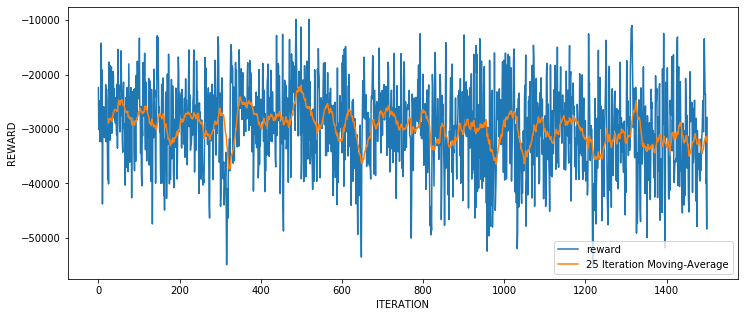

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

puck_results = pd.read_csv('results.csv')
puck_results['25-MA'] = puck_results['rewards'].rolling(window=25).mean()
puck_results['1000-MA'] = puck_results['rewards'].rolling(window=1000).mean()

plt.figure(figsize=(12,5))
plt.xlabel('ITERATION')
plt.ylabel('REWARD')
plt.plot(puck_results['rewards'], label = 'reward')
plt.plot(puck_results['25-MA'], label = '25 Iteration Moving-Average')
#plt.plot(puck_results['1000-MA'], label = '1,000 Iteration Moving-Average')
plt.legend(loc="lower right")
#plt.savefig('./puckworld_3.png')